## Machine Learning Lab 4: Comparison between two algorithms FP-growth and Apriori algorithm
Name: Deshmukh Pratik Bhushanrao    
Roll No: 2448513

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import time
import threading as T
warnings.filterwarnings('ignore')

Inference:

    Imported all the necessary libraries:
    pandas for data manipulation
    seaborn and matplotlib for data visualization,
    time for calculating time and
    threading to achieve parallel porcessing.

In [2]:
df = pd.read_csv('data\Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


Inference:

    loaded data into a variable called df

# EDA

In [3]:
df.itemDescription.nunique()

167

Inference:

    Getting all the unique values in our itemDescription column

In [4]:
freq_df = df.itemDescription.value_counts()[:20].copy()
freq_df

itemDescription
whole milk            2502
other vegetables      1898
rolls/buns            1716
soda                  1514
yogurt                1334
root vegetables       1071
tropical fruit        1032
bottled water          933
sausage                924
citrus fruit           812
pastry                 785
pip fruit              744
shopping bags          731
canned beer            717
bottled beer           687
whipped/sour cream     662
newspapers             596
frankfurter            580
brown bread            571
pork                   566
Name: count, dtype: int64

Inference:

    Taking top 20 frequent items out of the dataset

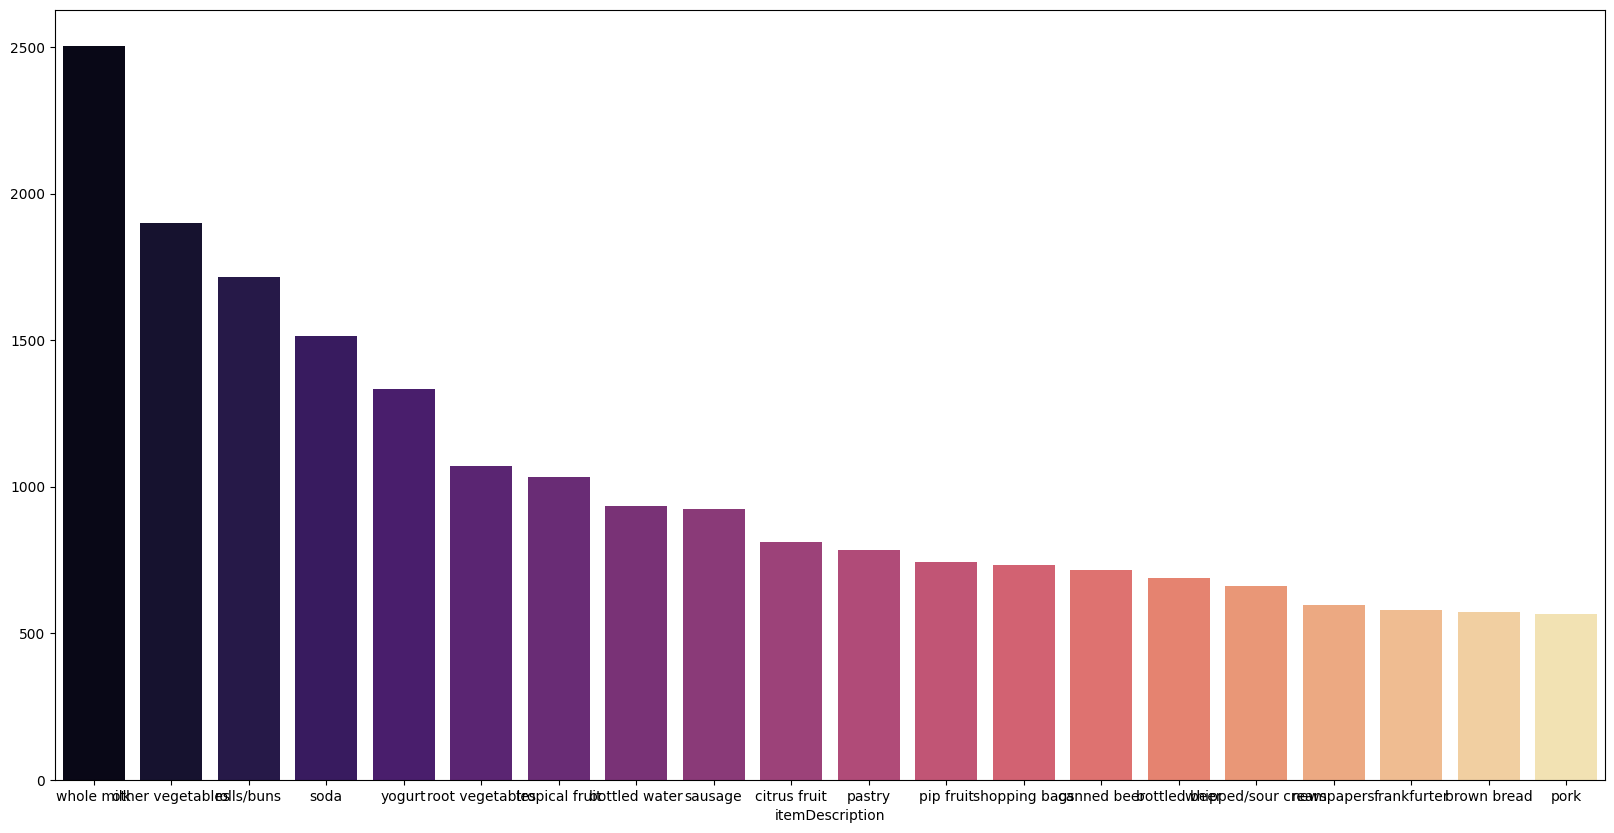

In [5]:
plt.figure(figsize=(20,10))
sns.barplot(x=freq_df.index, y=freq_df.values, palette='magma')
plt.show()

Inference:

    Plotted the graph showing frequency of top 20 frequent items

Task

In [6]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

Inference:

    imported apriori, fpgrowth and association_rules for performing our task on our data

In [7]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [8]:
df['Quantity']=1
df.head()

,Member_number,Date,itemDescription,Quantity
0,1808,21-07-2015,tropical fruit,1
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,01-02-2015,whole milk,1


In [9]:
transaction = df.groupby(['Member_number', 'itemDescription'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Member_number')
transaction.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


Inference:

    Created one-hot encoded vecorts for all the items in our itemDescription column

In [10]:
transaction.isna().sum()

itemDescription
Instant food products    0
UHT-milk                 0
abrasive cleaner         0
artif. sweetener         0
baby cosmetics           0
                        ..
white bread              0
white wine               0
whole milk               0
yogurt                   0
zwieback                 0
Length: 167, dtype: int64

Inference:

    Checking for any null values using dataframe.isna() method.

In [11]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
transaction = transaction.applymap(lambda x: encode_units(x))
transaction.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Inference:

    Created the function returning value '0' or '1' based upon the values in the row and mapped the same on the dataframe.

In [12]:
executiontime = [0, 0]
apriori_runtime = T.Event()
fp_runtime = T.Event()

Inference:

    Create 3 variables,
    executiontime for keeping records of the the execution time of both apriori and fpgrowth algorithm,
    apriori_runtime for keeping record of the runtime,
    fp_runtime for keeping record of the runtime.

In [13]:
# support = float(input("Enter the value for the support: "))

res={}

Infrence:

    created an empty dictionary for keeping the record of the frequent itemset returned by both of the algorithms.

In [14]:
def apriori_run(inp_support=0.02):
    stime = time.time()
    frequent_itemsets = apriori(transaction, use_colnames=True,min_support=inp_support)
    executiontime[0] = time.time() - stime
    # print('Time taken: ', executiontime[0])
    res['apriori'] = frequent_itemsets
    apriori_runtime.set()

Infrence:

    Defined a function which runs apriori algorithm and keeps the record of the execution time for apriori algorithm and sets the ffrequent itemset to our dictionary returned by apriori algorithm.

In [15]:
def fp_run(inp_support=0.02):
    stime = time.time()
    frequent_itemsets = fpgrowth(transaction, use_colnames=True,min_support=inp_support)
    executiontime[1] = time.time() - stime
    # print('Time taken: ', executiontime[1])
    res['fp'] = frequent_itemsets
    fp_runtime.set()

Infrence:

    Defined a function which runs fp-growth algorithm and keeps the record of the execution time for apriori algorithm and sets the ffrequent itemset to our dictionary returned by fp-growth algorithm.

In [16]:
thread_apriori = T.Thread(target=apriori_run) #, args=[support])
thread_fp = T.Thread(target=fp_run) #, args=[support])

Infrence:

    Running both apriori and fp-growth algorithm simultenously using Threads

In [17]:
thread_apriori.start()
thread_fp.start()
apriori_runtime.wait()
fp_runtime.wait()
thread_apriori.join()
thread_fp.join()
print('Time taken for apriori: ', executiontime[0])
print('Time taken for fp: ', executiontime[1])

c:\Users\prati\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\prati\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Time taken for apriori:  0.7570362091064453
Time taken for fp:  0.3312258720397949


Time comparison

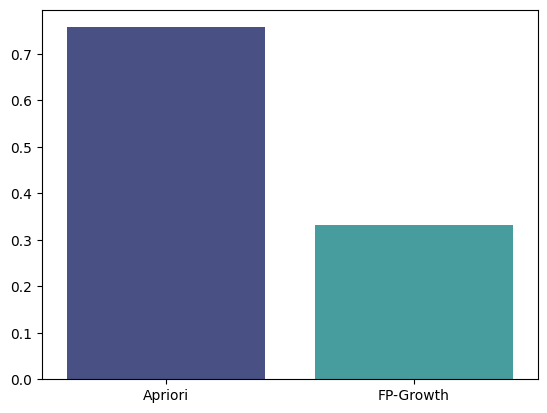

In [18]:
Algorithm = ['Apriori', 'FP-Growth']
Time = [executiontime[0], executiontime[1]]

sns.barplot(x=Algorithm, y=Time, palette='mako')
plt.show()

Infrence:

    Plotted the time difference fp-growth and apriori algorithms execution time using seaborn

In [19]:
if executiontime[0] < executiontime[1]:
    print("Apriori is Faster")
elif executiontime[1] < executiontime[0]:
    print("FP-Growth is Faster")
else:
    print("Both are equal")

FP-Growth is Faster


Infrence:

    Checking which algorithm is faster by using simple condition

In [21]:
def association_rule_for_apriori(item_set, min_threshold=0.02):
    return association_rules(item_set, min_threshold=min_threshold)

def association_rules_for_fp(item_set, min_threshold=0.02):
    return association_rules(item_set, metric='confidence', min_threshold=min_threshold)


if input("Do you want to mine association rules on the data, press 'Y' to yes else 'N': ").lower() == 'y':
    min_confidence = float(input("Enter the value for the confidence: "))
    apriori_rules = association_rule_for_apriori(res['apriori'], min_confidence)
    fp_rules = association_rules_for_fp(res['fp'], min_confidence)

    print("Association rules of apriori algorith: \n", apriori_rules, "\n")
    print("Association rules of fp-growth algorithm: \n", fp_rules, )


Association rules of apriori algorith: 
                antecedents                       consequents  \
0          (bottled water)                        (UHT-milk)   
1               (UHT-milk)                   (bottled water)   
2       (other vegetables)                        (UHT-milk)   
3               (UHT-milk)                (other vegetables)   
4             (rolls/buns)                        (UHT-milk)   
...                    ...                               ...   
2985  (yogurt, whole milk)                (rolls/buns, soda)   
2986          (rolls/buns)        (soda, yogurt, whole milk)   
2987                (soda)  (rolls/buns, yogurt, whole milk)   
2988              (yogurt)    (rolls/buns, soda, whole milk)   
2989          (whole milk)        (rolls/buns, soda, yogurt)   

      antecedent support  consequent support   support  confidence      lift  \
0               0.213699            0.078502  0.021293    0.099640  1.269268   
1               0.078502      

Infrence:

    Calculating association rules for our dataset

In [37]:
apriori_rules.sort_values(by='confidence', ascending=False)[:10].reset_index().drop('index', axis=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(other vegetables, yogurt, bottled water)",(whole milk),0.032324,0.458184,0.022063,0.682540,1.489664,0.007252,1.706721,0.339688
1,"(bottled beer, shopping bags)",(whole milk),0.030272,0.458184,0.020010,0.661017,1.442690,0.006140,1.598358,0.316429
2,"(rolls/buns, other vegetables, yogurt)",(whole milk),0.052335,0.458184,0.034377,0.656863,1.433623,0.010398,1.579008,0.319170
3,"(canned beer, shopping bags)",(whole milk),0.033607,0.458184,0.022063,0.656489,1.432806,0.006664,1.577287,0.312574
4,"(other vegetables, soda, yogurt)",(whole milk),0.043099,0.458184,0.027963,0.648810,1.416047,0.008216,1.542799,0.307042
5,"(other vegetables, tropical fruit, yogurt)",(whole milk),0.032837,0.458184,0.021293,0.648438,1.415235,0.006247,1.541166,0.303365
6,"(pastry, other vegetables, rolls/buns)",(whole milk),0.032324,0.458184,0.020780,0.642857,1.403056,0.005969,1.517086,0.296866
7,"(rolls/buns, other vegetables, shopping bags)",(whole milk),0.032837,0.458184,0.021036,0.640625,1.398184,0.005991,1.507663,0.294456
8,"(rolls/buns, yogurt, sausage)",(whole milk),0.035659,0.458184,0.022832,0.640288,1.397448,0.006494,1.506249,0.294927
9,"(curd, yogurt)",(whole milk),0.040277,0.458184,0.025398,0.630573,1.376246,0.006943,1.466641,0.284859


Infrence:
    
    Getting top 10 association rules.

In [38]:
fp_rules.sort_values(by='confidence', ascending=False)[:10].reset_index().drop('index', axis=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(other vegetables, yogurt, bottled water)",(whole milk),0.032324,0.458184,0.022063,0.682540,1.489664,0.007252,1.706721,0.339688
1,"(bottled beer, shopping bags)",(whole milk),0.030272,0.458184,0.020010,0.661017,1.442690,0.006140,1.598358,0.316429
2,"(rolls/buns, other vegetables, yogurt)",(whole milk),0.052335,0.458184,0.034377,0.656863,1.433623,0.010398,1.579008,0.319170
3,"(canned beer, shopping bags)",(whole milk),0.033607,0.458184,0.022063,0.656489,1.432806,0.006664,1.577287,0.312574
4,"(other vegetables, soda, yogurt)",(whole milk),0.043099,0.458184,0.027963,0.648810,1.416047,0.008216,1.542799,0.307042
5,"(other vegetables, tropical fruit, yogurt)",(whole milk),0.032837,0.458184,0.021293,0.648438,1.415235,0.006247,1.541166,0.303365
6,"(pastry, other vegetables, rolls/buns)",(whole milk),0.032324,0.458184,0.020780,0.642857,1.403056,0.005969,1.517086,0.296866
7,"(rolls/buns, other vegetables, shopping bags)",(whole milk),0.032837,0.458184,0.021036,0.640625,1.398184,0.005991,1.507663,0.294456
8,"(rolls/buns, yogurt, sausage)",(whole milk),0.035659,0.458184,0.022832,0.640288,1.397448,0.006494,1.506249,0.294927
9,"(curd, yogurt)",(whole milk),0.040277,0.458184,0.025398,0.630573,1.376246,0.006943,1.466641,0.284859


Infrence:
    
    Getting top 10 association rules.

Conclusing:

    By comparing the association rules by both the algorithm we can say that, both apriori algorithm and fp-growth algorith returns the same association rules although the main diffenence between both of them is the amount of time they consumes of completing their task
    - fp-growth algorithm is faster as compared to apriori algorithm.
    - It's recommended to work with fp-growth algorithm to save the processing time 